In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from scipy.stats import norm

# 様々な平均・標準偏差を持つ正規分布を重点関数gとみなして、収束速度がどのように変わるか調査

In [2]:
a = 5.0

In [3]:
norms = [(0,1), (5,1), (10,1), (0,3), (5,3), (10,3)]

## 被積分関数

In [4]:
f = norm.pdf
h = lambda x: x>a
y = lambda x: h(x) * f(x)

## 被積分関数を描画

In [5]:
ix = np.arange(-5, 15, 0.01)
plt.plot(ix, f(ix), label='f(x)')
plt.plot(ix, h(ix), label='h(x)')

In [6]:
for m, std in norms:
    g = norm(loc=m, scale=std).pdf
    plt.plot(ix, g(ix), label="mean=%d std=%d" % (m, std))

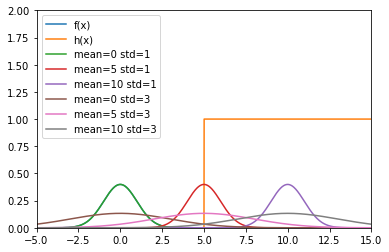

In [7]:
plt.xlim((-5, 15))
plt.ylim((0, 2))
plt.legend(loc='best')
plt.show()

## sicpy.integrateでの積分

In [8]:
I = scipy.integrate.quad(y, -np.inf, np.inf)[0]
print("scipy.integrate:", I)

scipy.integrate: 2.866527562360824e-07


In [9]:
N = 2000

## 重点サンプリングの場合

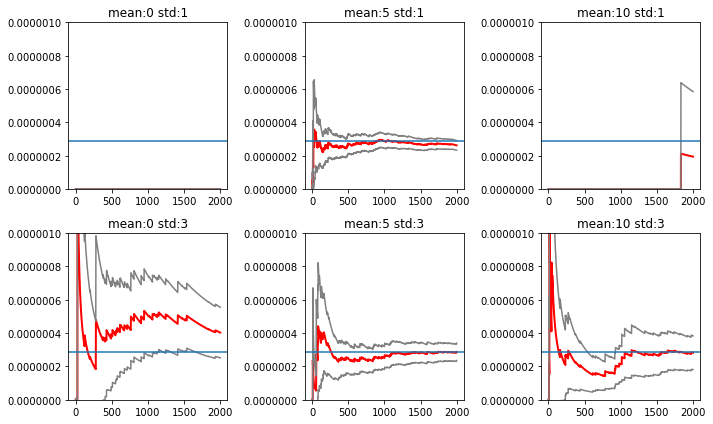

In [10]:
base_loc = 231
plt.figure(figsize=(10, 6))
for m, std in norms:
    plt.subplot(base_loc)
    g = norm(loc=m, scale=std).pdf
    x = norm(loc=m, scale=std).rvs(size=N)
    x = f(x) / g(x) * h(x)
    estint = np.cumsum(x) / np.arange(1, N + 1)
    esterr = np.sqrt(np.cumsum((x - estint) ** 2)) / np.arange(1, N + 1)
    plt.plot(estint, color='red', linewidth=2)
    plt.plot(estint + 2 * esterr, color='gray')
    plt.plot(estint - 2 * esterr, color='gray')
    plt.axhline(y=I)
    plt.ylim((0, 1e-06))
    plt.title('mean:%d std:%d' % (m, std))
    base_loc += 1
plt.tight_layout()
plt.show()